## Graficador da Base de dados sintéticos e dos poços de classificação do artigo 1

In [1]:
####################PACOTES###########################
%matplotlib inline
import numpy as np
import pylab as py
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Latex
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
import sys

#---------------------
sys.path.insert(0,'../modules')
from appynho import plotagem as plm

#######################################################

# Banco de dados sintético (BD)

In [2]:
DB= pd.read_csv("../inputs/BDsintetico.txt", sep='\s+' , skiprows=2, names=('Rock', 'Code' ,'Depth(m)' ,'RHOB', 'GR','SP','DT'))
df=pd.DataFrame(DB)
#df=df.drop([0])#retira cabeçalho
#df=df.drop('Rock',axis=1)#retira a coluna litologia
df=df.drop('Code',axis=1) #retira a coluna codigo
df=df.drop('Depth(m)',axis=1) #retira a coluna prof
#print(df,type(df))
#scatter_matrix(df, alpha=0.2, figsize= (12,12), diagonal='hist') #uma primeira abordagem

In [3]:
#Cria o dicionário de cores do meu modelo baseado em moriak


# primeiro método
#codigo=dict()
#codigo['#00d34e']='shale2'
#codigo['#82a7dd']='dolomite'

# segundo método
codigo={'#00d34e':'shale2',
       '#82a7dd' :'dolomite',
       '#ff0004' :'diabase',
       '#ff6004' :'conglomerate',
       '#f4a15a' :'ce1',
       '#ffddaa' :'ce2',
       '#ffd9b7' :'ce3',
       '#faead6' :'ce4',
       '#ffbca4' :'crystalline',
       '#7b7b01' :'shale1',
       '#173c72' :'halite',
       '#a70001' :'granite',
       '#ffe57b' :'sandstone'}
print(codigo,type(codigo))

{'#00d34e': 'shale2', '#82a7dd': 'dolomite', '#ff0004': 'diabase', '#ff6004': 'conglomerate', '#f4a15a': 'ce1', '#ffddaa': 'ce2', '#ffd9b7': 'ce3', '#faead6': 'ce4', '#ffbca4': 'crystalline', '#7b7b01': 'shale1', '#173c72': 'halite', '#a70001': 'granite', '#ffe57b': 'sandstone'} <class 'dict'>


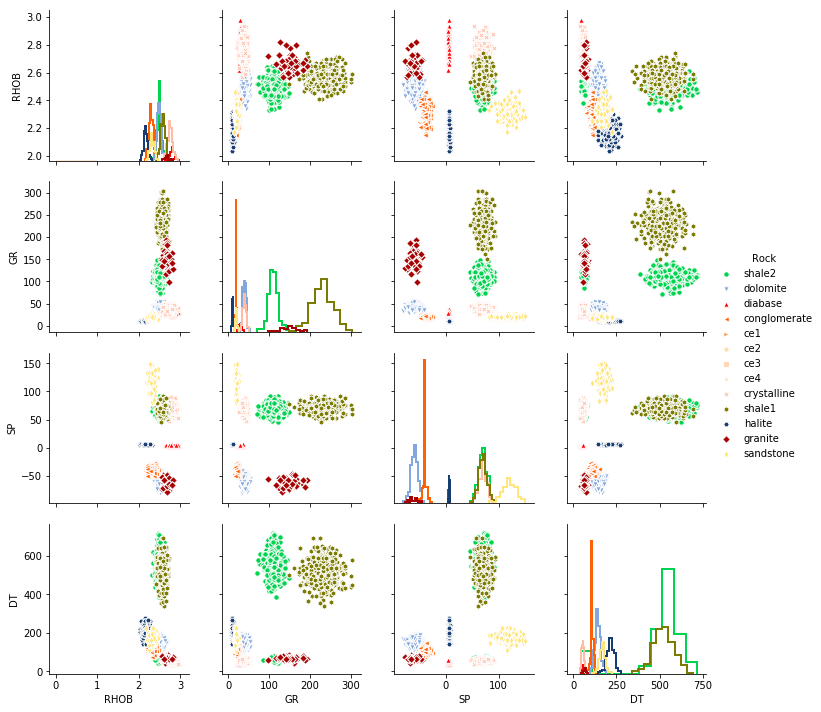

In [4]:
#g = sns.PairGrid(df, hue="Rock",palette=codigo.keys(),hue_kws={"marker": ['o', 'v', '^', '<', '>', '8', 's', 'p', 'X', 'h', 'H', 'D', 'd']})
g = sns.PairGrid(df, hue="Rock",hue_order=codigo.values(),palette=codigo.keys(),hue_kws={"marker": ['o', 'v', '^', '<', '>', '8', 's', 'p', 'X', 'h', 'H', 'D', 'd']})
g = g.map_diag(plt.hist, histtype="step", linewidth=2) #ERROR
g = g.map_offdiag(plt.scatter, linewidths=1,edgecolor="w" ,s=30)
g = g.add_legend()
g = g.savefig('../images/BDsintetico.pdf',dpi=600)

In [5]:
## Banco de dados BD para o gráfico de pizza

# lê os dados de perfiliagem e rochas originais
BD = pd.read_csv("../inputs/BDsintetico.txt", sep='\s+' , skiprows=1, names=('Rock', 'Code' ,'Depth' ,'RHOB', 'GR','SP','DT'))


codBD = np.array(BD.Code) # códigos de rocha
profBD = np.array(BD.Depth)

#print(codBD)


codigo={1:['#00d34e','shale2'],
        2:['#82a7dd','dolomite'],
        3:['#ff0004','diabase'],
        4:['#ff6004','conglomerate'],
       451:['#f4a15a','ce1'],
       452:['#ffddaa','ce2'],
       453:['#ffd9b7','ce3'],
       454:['#faead6','ce4'],
         5:['#ffbca4','crystalline'],
       6:['#7b7b01' ,'shale1'],
       7:['#173c72' ,'halite'],
       8:['#a70001' ,'granite'],
       9:['#ffe57b' ,'sandstone'],
       10:['#000000','basalt']}


def contador(data,cod):
    """Retorna o número de amostras em dados de perfilagem."""
    ndado=0
    for i in range(np.size(data)):
        if (data[i] == cod):
            ndado = ndado + 1
        else:
            ndado = ndado
    return ndado

print('Shale2=',contador(codBD,1))
print('Dolomite=',contador(codBD,2))
print('Diabase=',contador(codBD,3))
print('Conglomerate=',contador(codBD,4))
print('ce1=',contador(codBD,451))
print('ce2=',contador(codBD,452))
print('ce3=',contador(codBD,453))
print('ce4=',contador(codBD,454))
print('Crystalline=',contador(codBD,5))
print('Shale1=',contador(codBD,6))
print('Halite=',contador(codBD,7))
print('Granite=',contador(codBD,8))
print('Sandstone=',contador(codBD,9))
print('Basalt=',contador(codBD,10))



#plt.pie(codBD,explode='np.array[1,2,3,4,451,452,453,454,5,6,7,8,9]')


#fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
#
#
#
##data = [float(x.split()[0]) for x in recipe]
##ingredients = [x.split()[-1] for x in recipe]
#
#
#def func(pct, allvals):
#    absolute = int(pct/100.*np.sum(allvals))
#    return "{:.1f}%\n({:d} g)".format(pct, absolute)
#
#
#wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
#

#ax.legend(wedges, ingredients,
#          title="Ingredients",
#          loc="center left",
#          bbox_to_anchor=(1, 0, 0.5, 1))
#
#plt.setp(autotexts, size=8, weight="bold")
#
#ax.set_title("Matplotlib bakery: A pie")
#
#plt.show()

Shale2= 446
Dolomite= 454
Diabase= 89
Conglomerate= 429
ce1= 22
ce2= 22
ce3= 22
ce4= 22
Crystalline= 292
Shale1= 386
Halite= 265
Granite= 43
Sandstone= 198
Basalt= 0


### Conjunto de dados de classificação (c1)

In [6]:
c1 = pd.read_csv("../inputs/C1.txt", sep='\s+' , skiprows=1, names=('Rock', 'Code' ,'Depth(m)' ,'RHOB', 'GR','SP','DT'))
#print(c1)

### Visualizando o dado

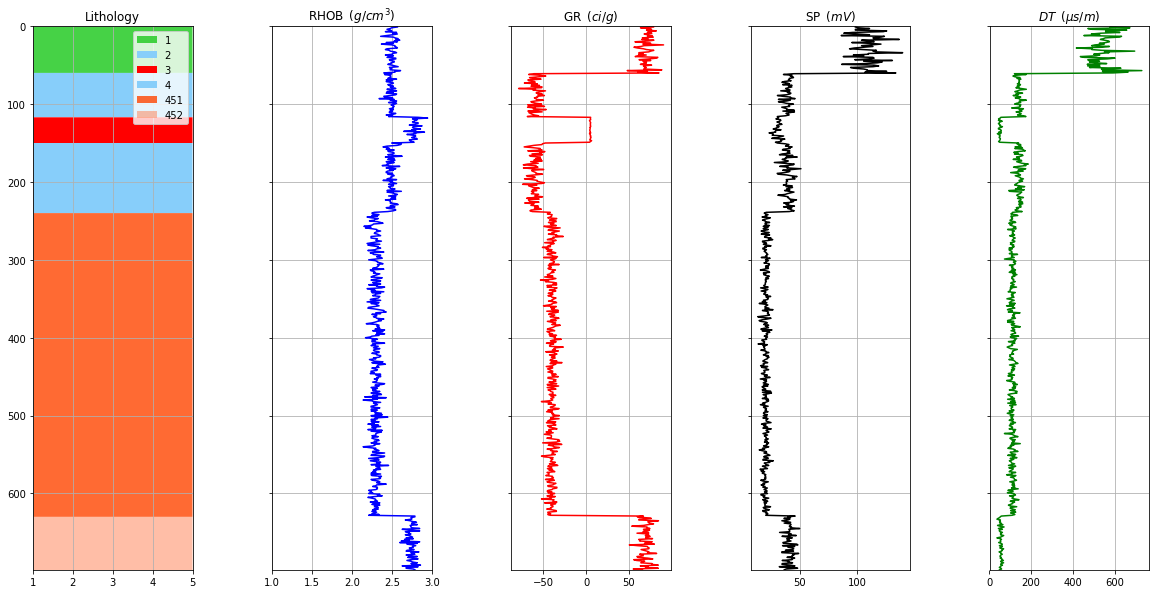

In [7]:
################################## Gerando o gráfico da perfilagem ################################################
#plotando os dados para o poço C1:

poco = np.loadtxt("../inputs/C1.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

#print(poco)

cod = poco[:,0]
prof = poco[:,1]
RHOB = poco[:,2]
GR = poco[:,4]
SP = poco[:,3]
DT = poco[:,5]


py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharey=True)

ax1.set_ylim(top=0, bottom=698)
#ax1.plot(cod, prof, 'k')
ax1.fill_between(cod, 0, 60, where=60 >= 0, facecolor='limegreen', alpha=0.9 ,interpolate=True)
ax1.fill_between(cod, 60, 117, where=60 <= 117, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 117, 150, where=117 <= 150, facecolor='red', interpolate=True)
ax1.fill_between(cod, 150, 240, where=150 <= 240, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 240, 630, where=240 <= 630, facecolor='orangered',alpha=0.8 ,interpolate=True)
ax1.fill_between(cod, 630, 700, where=630 <= 700, facecolor='coral',alpha=0.5 ,interpolate=True)
ax1.set_title('Lithology')
#ax1.plot(cod, prof, 'b')
ax1.set_xlim(1,5)
ax1.invert_yaxis()
ax1.grid()
ax1.legend(codigo)
#ax1.set_aspect(1)

ax2.set_ylim(top=0, bottom=698)
ax2.set_title('RHOB$\hspace{0.5}(g/cm^{3}$)')
ax2.plot(RHOB, prof, 'b')
ax2.set_xlim(1, 3)
ax2.invert_yaxis()
ax2.grid()
#ax2.set_aspect(1)

ax3.set_ylim(top=0, bottom=698)
ax3.set_title('GR$\hspace{0.5}(ci/g$)')
ax3.plot(GR, prof, 'r') 
#ax3.imshow(mb,cmap='hsv')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_aspect(1)

ax4.set_ylim(top=0, bottom=698)
ax4.set_title('SP$\hspace{0.5}(mV)$')
ax4.plot(SP, prof, 'k') 
ax4.invert_yaxis()
ax4.grid()
#ax4.set_aspect(1)

ax5.set_ylim(top=0, bottom=698)
ax5.set_title('$DT \hspace{0.5}(\mu s/m)$')
ax5.plot(DT, prof, 'g') 
#ax5.invert_yaxis()
ax5.grid()
#ax5.set_aspect(1)


fig.subplots_adjust(hspace=0.2,wspace=0.5)

#ax2.set_title("Densidade x Raio-Gama")
#ax2.set_xlabel('$Po\c{c}o$ mb', fontsize='xx-large')

#plt.title('Perfilagem do $Po\c{c}o$ T1', fontsize='xx-large', loc='center')
plt.draw()
plt.savefig('../images/C1.pdf',dpi=300) 
plt.show()

In [18]:
df2=pd.DataFrame(c1)
df2=df2.drop('Code',axis=1) #retira a coluna codigo
df2=df2.drop('Depth(m)',axis=1) #retira a coluna prof
#df2

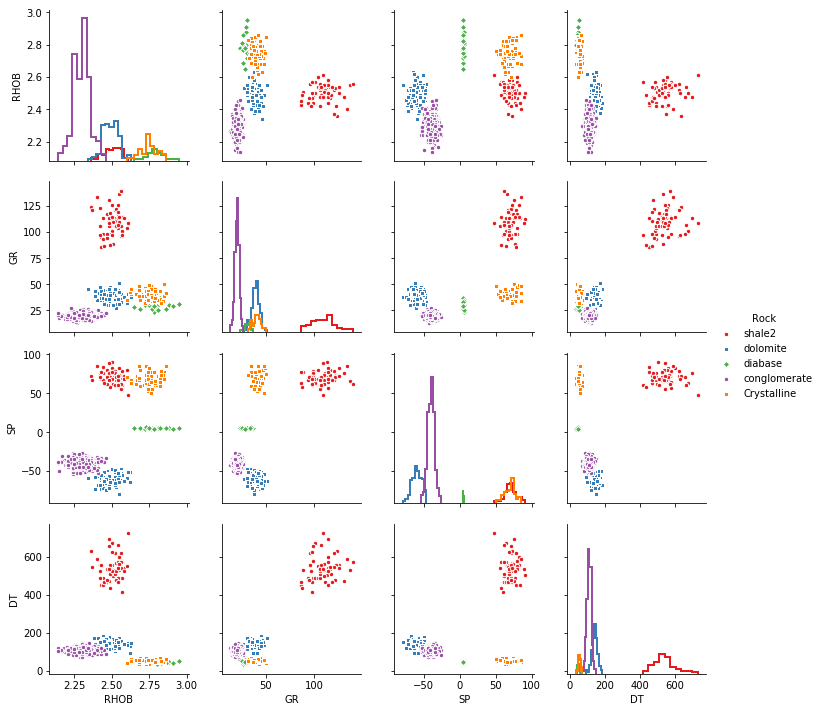

In [19]:
#g = sns.PairGrid(df2, hue="Rock",palette=codigo,hue_kws={"marker": ["o", "s", "D","o", "s", "D","o", "s", "D"]})
g = sns.PairGrid(df2, hue="Rock",palette='Set1',hue_kws={"marker": ["o", "s", "D","o", "s", "D","o", "s", "D"]})
g = g.map_diag(plt.hist, histtype="step", linewidth=2) #ERROR
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=20)
g = g.add_legend()
g = g.savefig('../images/C1dispersion.png')

### Conjunto de dados de classificação (c2)

In [20]:
#data3 = pd.read_csv("../inputs/dados_sint_c2.txt", sep='\s+',header=0,nrows=698 )
c2 = pd.read_csv("../inputs/C2.txt", sep='\s+' , skiprows=1, names=('Rock', 'Code' ,'Depth(m)' ,'RHOB', 'GR','SP','DT'))
#print(c2)

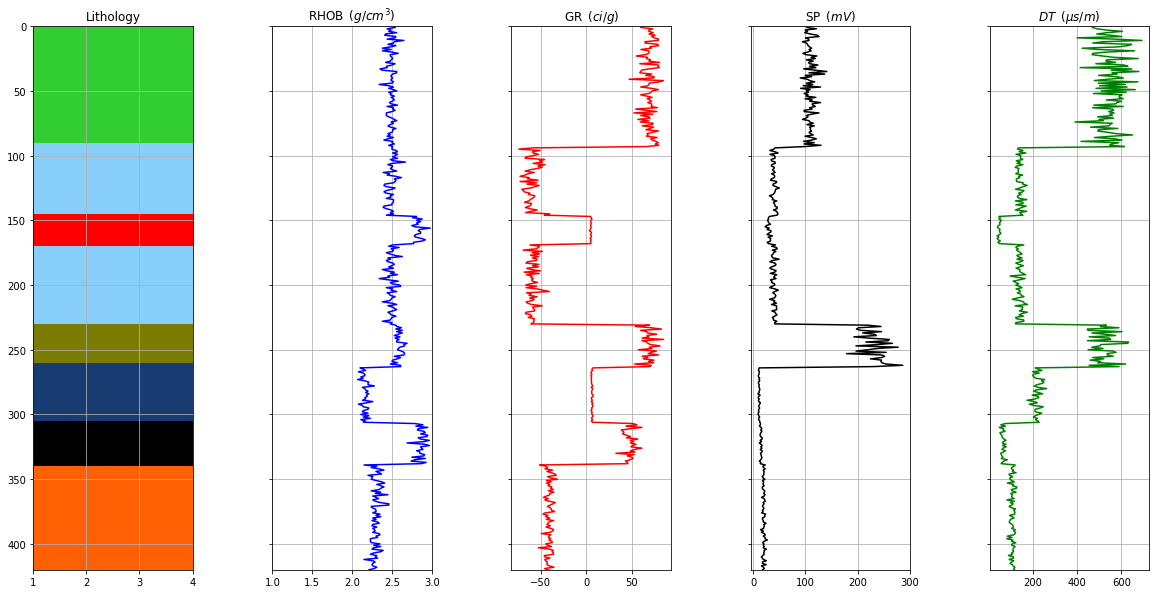

In [22]:
################################## Gerando o gráfico da perfilagem ################################################
#plotando os dados para o poço C2:

poco2 = np.loadtxt("../inputs/C2.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

#print(poco)

cod = poco2[:,0]
prof = poco2[:,1]
RHOB = poco2[:,2]
GR = poco2[:,4]
SP = poco2[:,3]
DT = poco2[:,5]


py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharey=True)

ax1.set_ylim(top=0, bottom=420)
#ax1.plot(cod, prof, 'k')
ax1.fill_between(cod, 0, 90,    where=90 >= 0, facecolor='limegreen', alpha=1 ,interpolate=True)#folhelho2
ax1.fill_between(cod, 90, 145, where=90 <= 145, facecolor='lightskyblue', interpolate=True)#dolomita
ax1.fill_between(cod, 145, 170, where=145 <= 170, facecolor='red', interpolate=True)#diabasio
ax1.fill_between(cod, 170, 230, where=170 <= 230, facecolor='lightskyblue', interpolate=True)#dolomita
ax1.fill_between(cod, 230, 260, where=230 <= 260, facecolor='#7b7b01',alpha=1 ,interpolate=True)#folhelho1
ax1.fill_between(cod, 260, 305, where=260 <= 305, facecolor='#173c72',alpha=1 ,interpolate=True)#halita
ax1.fill_between(cod, 305, 340, where=305 <= 340, facecolor='black',alpha=1 ,interpolate=True)#basalto
ax1.fill_between(cod, 340, 420, where=340 <= 420, facecolor='#ff6004',alpha=1 ,interpolate=True)##conglomerado
ax1.set_title('Lithology')
#ax1.plot(cod, prof, 'b')
ax1.set_xlim(1,4)
ax1.invert_yaxis()
ax1.grid()
#ax1.set_aspect(1)

ax2.set_ylim(top=0, bottom=420)
ax2.set_title('RHOB$\hspace{0.5}(g/cm^{3}$)')
ax2.plot(RHOB, prof, 'b')
ax2.set_xlim(1, 3)
ax2.invert_yaxis()
ax2.grid()
#ax2.set_aspect(1)

ax3.set_ylim(top=0, bottom=420)
ax3.set_title('GR$\hspace{0.5}(ci/g$)')
ax3.plot(GR, prof, 'r') 
#ax3.imshow(mb,cmap='hsv')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_aspect(1)

ax4.set_ylim(top=0, bottom=420)
ax4.set_title('SP$\hspace{0.5}(mV$)')
ax4.plot(SP, prof, 'k') 
ax4.invert_yaxis()
ax4.grid()
#ax4.set_aspect(1)

ax5.set_ylim(top=0, bottom=420)
ax5.set_title('$DT \hspace{0.5}(\mu s/m)$')
ax5.plot(DT, prof, 'g') 
#ax5.invert_yaxis()
ax5.grid()
#ax5.set_aspect(1)


fig.subplots_adjust(hspace=0.2,wspace=0.5)

#ax2.set_title("Densidade x Raio-Gama")
#ax2.set_xlabel('$Po\c{c}o$ mb', fontsize='xx-large')

#plt.title('Perfilagem do $Po\c{c}o$ T1', fontsize='xx-large', loc='center')
plt.draw()
plt.savefig('../images/C2.pdf',dpi=600) 
plt.show()

In [23]:
#df3=pd.DataFrame(c2)
df3=c2.drop('Code',axis=1) #retira a coluna codigo
df3=df3.drop('Depth(m)',axis=1) #retira a coluna prof
#df3

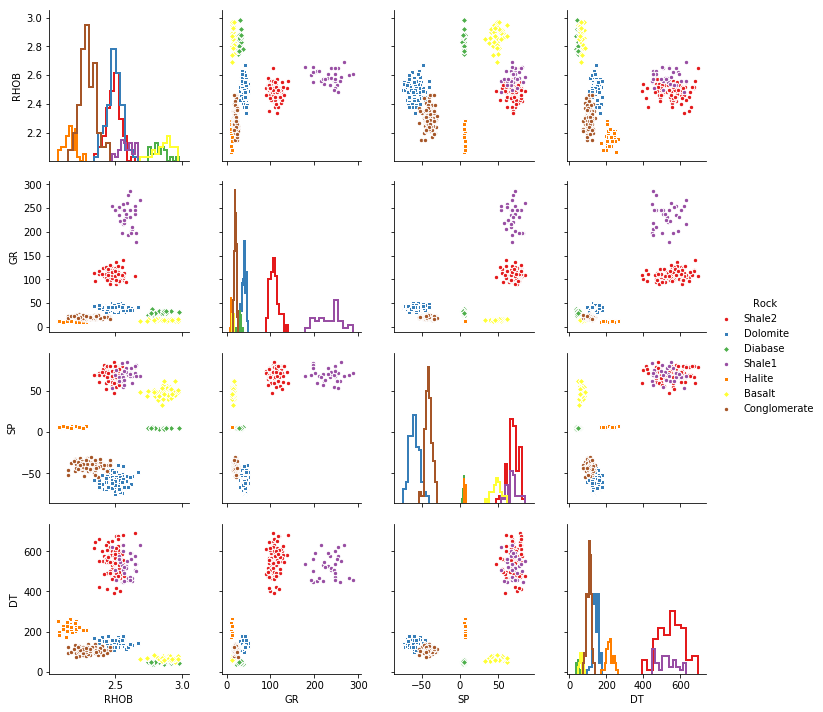

In [24]:
g = sns.PairGrid(df3, hue="Rock",palette="Set1",hue_kws={"marker": ["o", "s", "D","o", "s", "D","o", "s", "D"]})
#g = sns.PairGrid(df3, hue="Rock",hue_order=codigo.values(),palette=codigo.keys(),hue_kws={"marker": ['o', 'v', '^', '<', '>', '8', 's', 'p', 'X', 'h', 'H', 'D', 'd']})
g = g.map_diag(plt.hist, histtype="step", linewidth=2) #ERROR
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=20)
g = g.add_legend()
g = g.savefig('../images/C2dispersion.png')

# Poço C3

In [25]:
#c3 = pd.read_csv("../inputs/dados_sint_T1_r10%.txt", sep='\s+',header=0,nrows=698 )
c3df = pd.read_csv("../inputs/C3.txt", sep='\s+' , skiprows=1, names=('Rock', 'Code' ,'Depth(m)' ,'RHOB', 'GR','SP','DT'))
#print(c3df)

In [26]:
c3df.head()

,Rock,Code,Depth(m),RHOB,GR,SP,DT
0,Sandstone,9,1,2.35,18.8,103.0,145.0
1,Sandstone,9,2,2.26,22.1,126.0,152.0
2,Sandstone,9,3,2.31,18.0,118.0,165.0
3,Sandstone,9,4,2.28,18.8,118.0,187.0
4,Sandstone,9,5,2.37,17.9,127.0,166.0


In [27]:
c3df.shape

(450, 7)

In [28]:
c3df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 7 columns):
Rock        450 non-null object
Code        450 non-null int64
Depth(m)    450 non-null int64
RHOB        450 non-null float64
GR          450 non-null float64
SP          450 non-null float64
DT          450 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 24.7+ KB


### Visualizando o dado

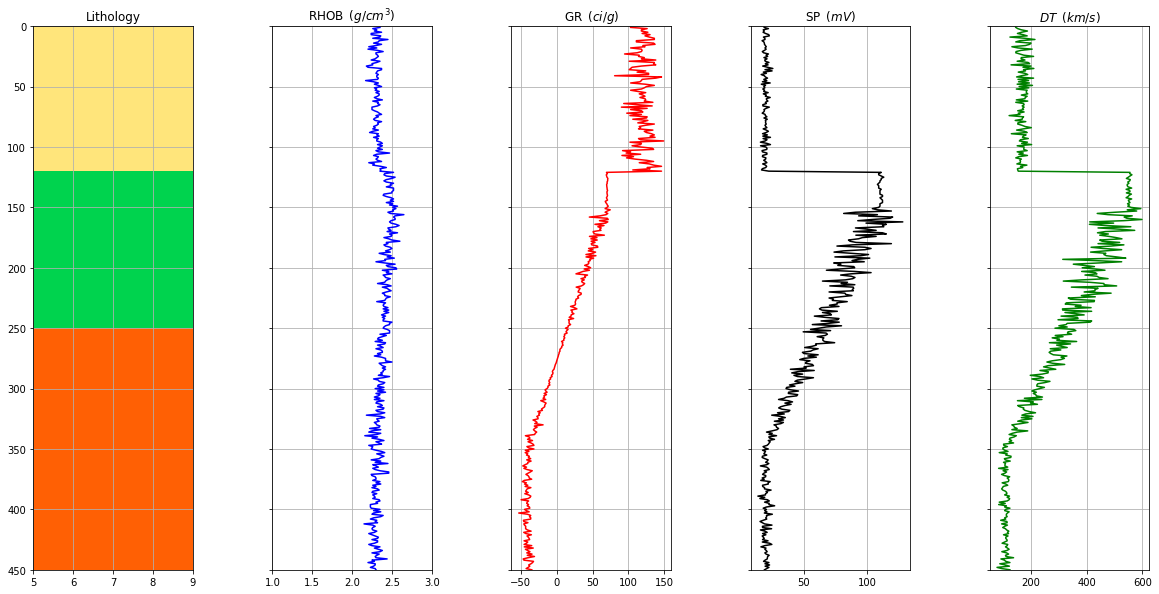

In [37]:
################################## Gerando o gráfico da perfilagem ################################################
#plotando os dados para o poço C3:

c3 = np.loadtxt("../inputs/C3.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

cod3 = c3[:,0]
prof3 = c3[:,1]
RHOB3 = c3[:,2]
GR3 = c3[:,4]
SP3 = c3[:,3]
DT3 = c3[:,5]


py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharey=True)

ax1.set_ylim(top=0, bottom=450)
#ax1.plot(cod3, prof3, 'k')
ax1.fill_between(cod3, 0, 120, where=120 >= 0, facecolor='#ffe57b' , interpolate=True)#arenito
#ax1.legend([(0, 50), ], ['Folhelho'])
ax1.fill_between(cod3, 120, 150, where=120 <= 150,  facecolor='#00d34e', interpolate=True)#folhelho2
ax1.fill_between(cod3, 150, 200, where=150 <= 200, facecolor='#00d34e',interpolate=True)#falha1
ax1.fill_between(cod3, 200, 250, where=200 <= 250,  facecolor='#00d34e', interpolate=True)#falha2
ax1.fill_between(cod3, 250, 300, where=250 <= 300,  facecolor='#ff6004', interpolate=True)#falha3
ax1.fill_between(cod3, 300, 350, where=300 <= 350, facecolor='#ff6004', interpolate=True)#falha4
ax1.fill_between(cod3, 350, 450, where=350 <= 450, facecolor='#ff6004', interpolate=True)#conglomerado
ax1.set_title('Lithology')
#ax1.plot(cod, prof, 'b')
ax1.set_xlim(5,9)
ax1.invert_yaxis()
ax1.grid()
#ax1.set_aspect(1)

ax2.set_ylim(top=0, bottom=450)
ax2.set_title('RHOB$\hspace{0.5}(g/cm^{3}$)')
ax2.plot(RHOB3, prof3, 'b')
ax2.set_xlim(1, 3)
ax2.invert_yaxis()
ax2.grid()
#ax2.set_aspect(1)

ax3.set_ylim(top=0, bottom=450)
ax3.set_title('GR$\hspace{0.5}(ci/g$)')
ax3.plot(GR3, prof3, 'r') 
#ax3.imshow(mb,cmap='hsv')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_aspect(1)

ax4.set_ylim(top=0, bottom=450)
ax4.set_title('SP$\hspace{0.5}(mV$)')
ax4.plot(SP3, prof3, 'k') 
ax4.invert_yaxis()
ax4.grid()
#ax4.set_aspect(1)

ax5.set_ylim(top=0, bottom=450)
ax5.set_title('$DT\hspace{0.5}(km/s$)')
ax5.plot(DT3, prof3, 'g') 
#ax5.invert_yaxis()
ax5.grid()
#ax5.set_aspect(1)


fig.subplots_adjust(hspace=0.2,wspace=0.5)

#ax2.set_title("Densidade x Raio-Gama")
#ax2.set_xlabel('$Po\c{c}o$ mb', fontsize='xx-large')

#plt.title('Perfilagem do $Po\c{c}o$ T1', fontsize='xx-large', loc='center')
plt.draw()
plt.savefig('../images/C3.pdf',dpi=600) 
plt.show()

### Gerando o Dataframe

In [38]:
c3d=pd.DataFrame(c3df)
c3d=c3d.drop('Code',axis=1) #retira a coluna codigo
c3d=c3d.drop('Depth(m)',axis=1) #retira a coluna prof
#print(df10)
#scatter_matrix(df10, alpha=0.2, figsize= (12,12), diagonal='hist') #uma primeira abordagem

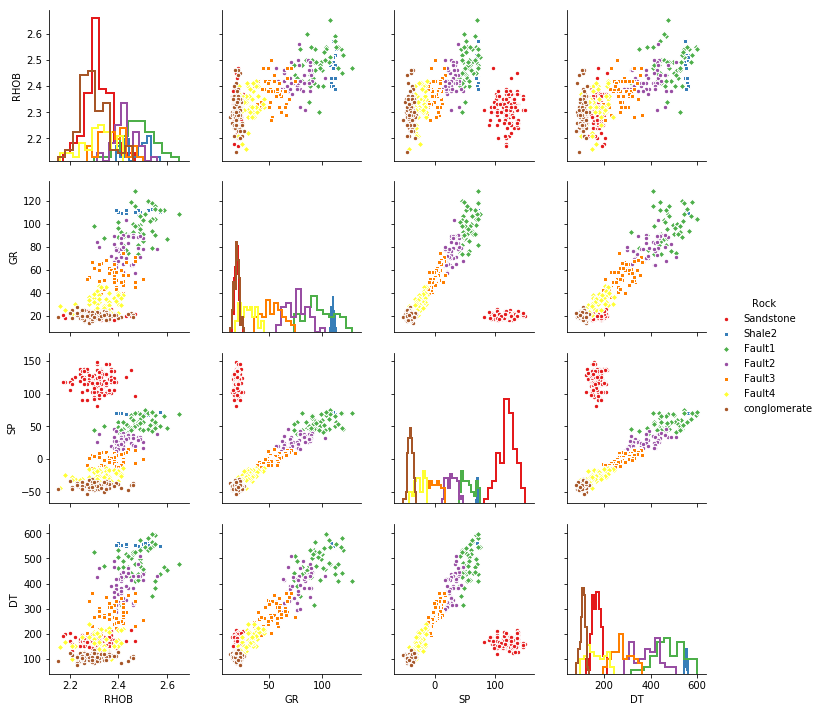

In [39]:
g = sns.PairGrid(c3d, hue="Rock",palette="Set1",hue_kws={"marker": ["o", "s", "D","o", "s", "D","o", "s", "D"]})
g = g.map_diag(plt.hist, histtype="step", linewidth=2) #ERROR
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=20)
g = g.add_legend()
g = g.savefig('../images/C3dispersion.png')

# Final da simulação para o artigo I


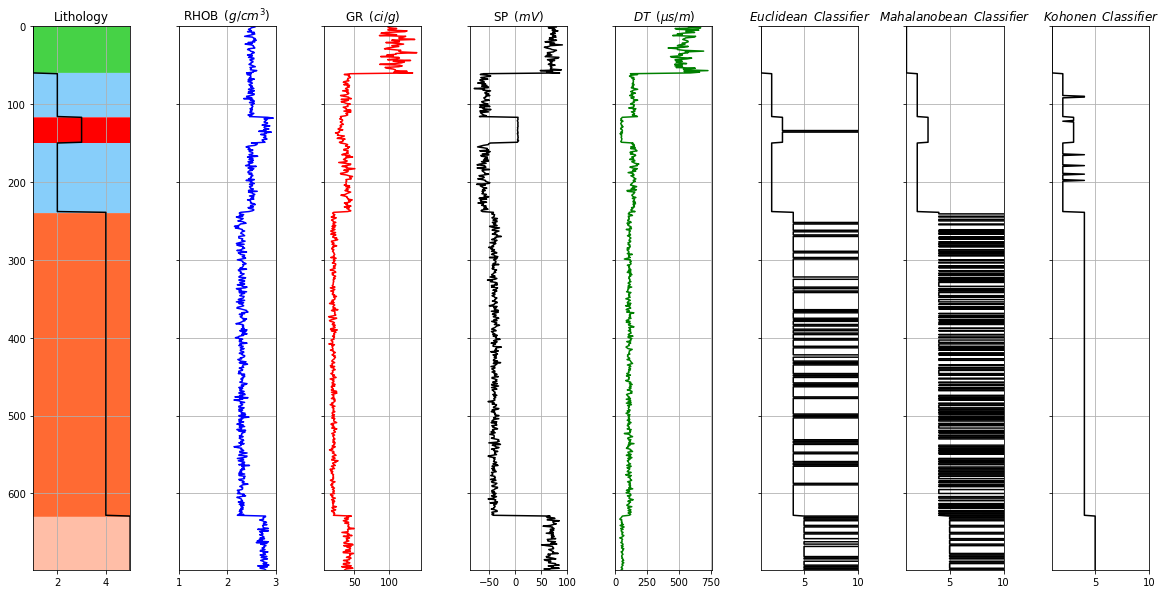

In [40]:
## Resultados de classificação Poço C1

# lê os dados de perfiliagem e rochas originais
poco = pd.read_csv("../inputs/Sintetico/C1.txt", sep='\s+' , skiprows=1, names=('Rock', 'Code' ,'Depth' ,'RHOB', 'GR','SP','DT'))
#print(c1)#np.loadtxt("../inputs/C1.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

#print(poco)

cod = np.array(poco.Code)
prof = np.array(poco.Depth)
RHOB = np.array(poco.RHOB)
GR = np.array(poco.GR)
SP = np.array(poco.SP)
DT = np.array(poco.DT)


#lê os dados da classificação Euclideana

euclides = pd.read_csv('../outputs/Sintetico/Result_eucli_C1_normalizado.txt', sep='\s+' , names=('Depth(m)' ,'Character', 'ClassEucli'))

ClassEuclides = np.array(euclides.ClassEucli)



#Lê os dados da classificação Mahalanobeana

maha = pd.read_csv('../outputs/Sintetico/Result_maha_C1_normalizado.txt', sep='\s+' , names=('Depth(m)' ,'Character', 'ClassMaha'))

ClassMahalanobis = np.array(maha.ClassMaha)

#Lê os dados da classificação Kohoneana

koho = pd.read_csv('../outputs/Sintetico/well_C1_SOM_normalizado.txt', sep='\s+' , names=('Depth(m)' ,'Character1', 'ClassKoho', 'Character2','Real','Character3'))

ClassKohonen = np.array(koho.ClassKoho)


# inicia o plot

py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura


fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(nrows=1, ncols=8, sharey=True)

ax1.set_ylim(top=0, bottom=698)
ax1.plot(cod, prof, 'k')
ax1.fill_between(cod, 0, 60, where=60 >= 0, facecolor='limegreen', alpha=0.9 ,interpolate=True)
ax1.fill_between(cod, 60, 117, where=60 <= 117, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 117, 150, where=117 <= 150, facecolor='red', interpolate=True)
ax1.fill_between(cod, 150, 240, where=150 <= 240, facecolor='lightskyblue', interpolate=True)
ax1.fill_between(cod, 240, 630, where=240 <= 630, facecolor='orangered',alpha=0.8 ,interpolate=True)
ax1.fill_between(cod, 630, 700, where=630 <= 700, facecolor='coral',alpha=0.5 ,interpolate=True)
ax1.set_title('Lithology')
#ax1.plot(cod, prof, 'b')
ax1.set_xlim(1,5)
ax1.invert_yaxis()
ax1.grid()
#ax1.set_aspect(1)

ax2.set_ylim(top=0, bottom=698)
ax2.set_title('RHOB$\hspace{0.5}(g/cm^{3}$)')
ax2.plot(RHOB, prof, 'b')
ax2.set_xlim(1, 3)
ax2.invert_yaxis()
ax2.grid()
#ax2.set_aspect(1)

ax3.set_ylim(top=0, bottom=698)
ax3.set_title('GR$\hspace{0.5}(ci/g$)')
ax3.plot(GR, prof, 'r') 
#ax3.imshow(mb,cmap='hsv')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_aspect(1)

ax4.set_ylim(top=0, bottom=698)
ax4.set_title('SP$\hspace{0.5}(mV)$')
ax4.plot(SP, prof, 'k') 
ax4.invert_yaxis()
ax4.grid()
#ax4.set_aspect(1)

ax5.set_ylim(top=0, bottom=698)
ax5.set_title('$DT \hspace{0.5}(\mu s/m)$')
ax5.plot(DT, prof, 'g') 
#ax5.invert_yaxis()
ax5.grid()
#ax5.set_aspect(1)


#Resultado do euclides
ax6.set_ylim(top=0, bottom=698)
ax6.set_title('$Euclidean \hspace{0.5} Classifier$')
ax6.plot(ClassEuclides, prof, 'k')
ax6.set_xlim(1,10)
#ax6.invert_yaxis()
ax6.grid()

#Resultado do mahalanobis
ax7.set_ylim(top=0, bottom=698)
ax7.set_title('$Mahalanobean \hspace{0.5} Classifier$')
ax7.plot(ClassMahalanobis, prof, 'k')
ax7.set_xlim(1,10)
#ax7.invert_yaxis()
ax7.grid()

#Resultado do kohonen
ax8.set_ylim(top=0, bottom=698)
ax8.set_title('$Kohonen \hspace{0.5} Classifier$')
ax8.plot(ClassKohonen, prof, 'k')
ax8.set_xlim(1,10)
#ax8.invert_yaxis()
ax8.grid()


fig.subplots_adjust(hspace=0.2,wspace=0.5)

#ax2.set_title("Densidade x Raio-Gama")
#ax2.set_xlabel('$Po\c{c}o$ mb', fontsize='xx-large')

#plt.title('Perfilagem do $Po\c{c}o$ T1', fontsize='xx-large', loc='center')

plt.savefig('../images/RESULTADOC1_old.png') 


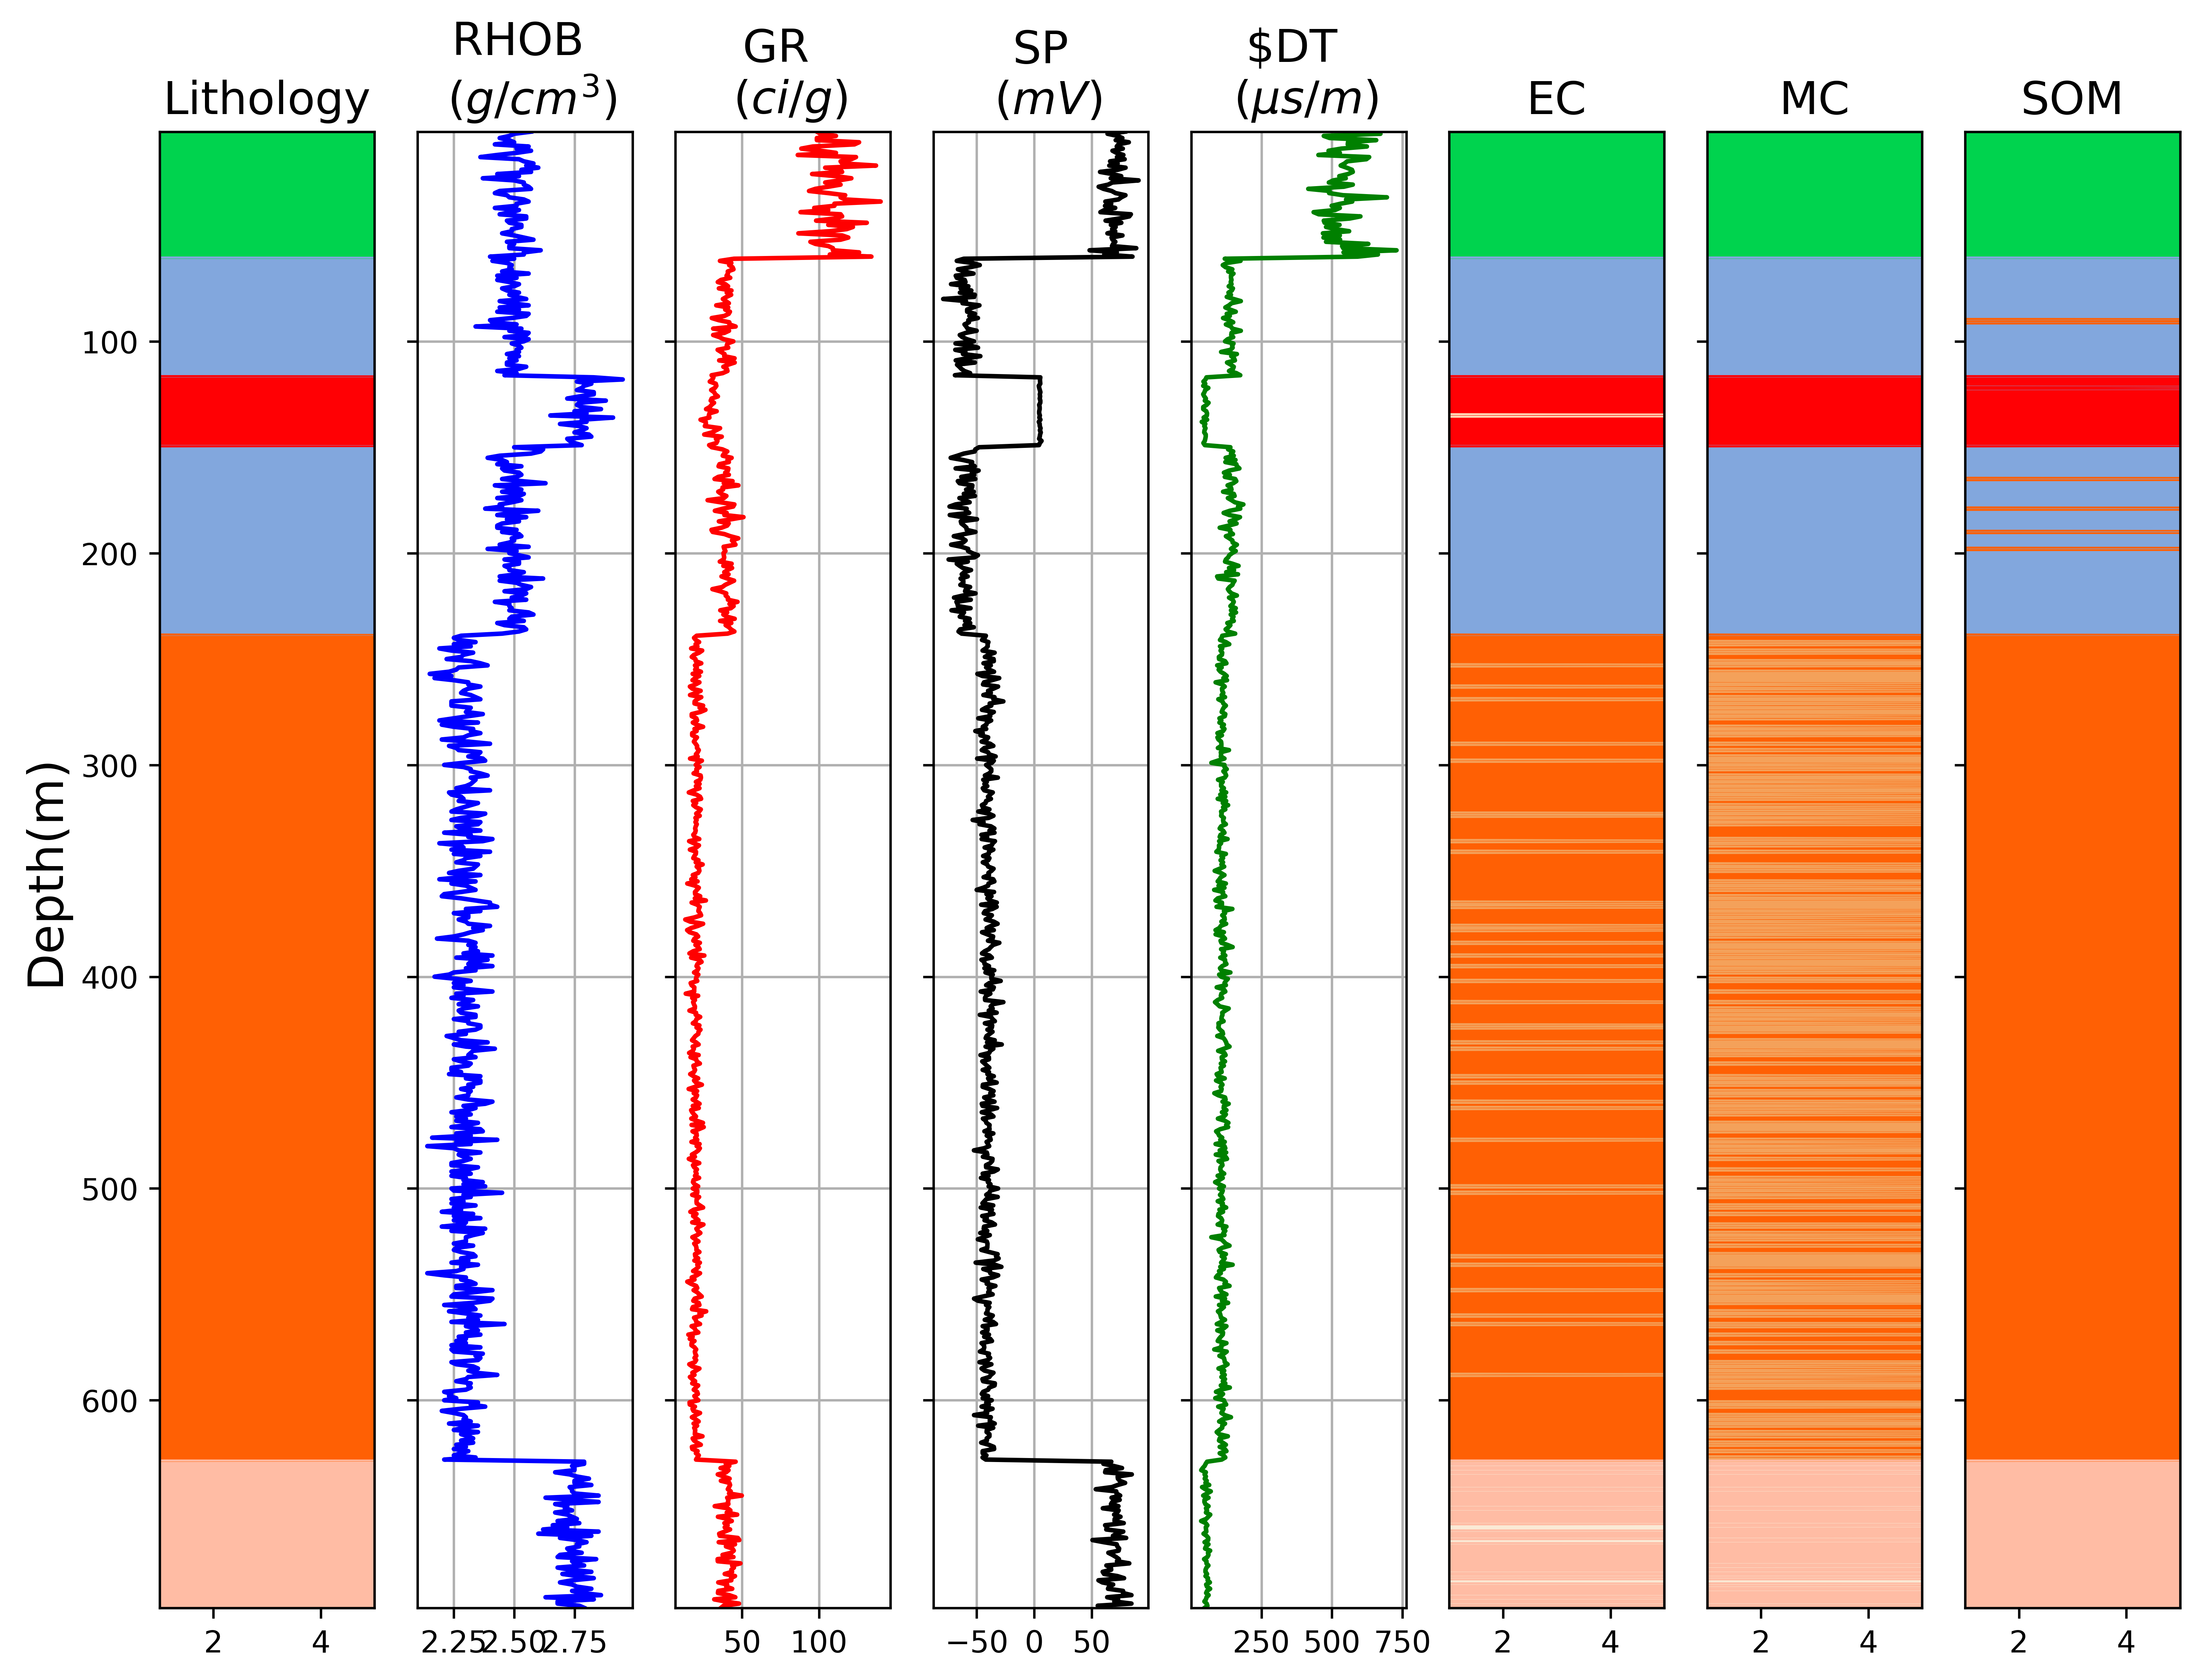

In [43]:

cod = np.array(poco.Code)
prof = np.array(poco.Depth)
RHOB = np.array(poco.RHOB)
GR = np.array(poco.GR)
SP = np.array(poco.SP)
DT = np.array(poco.DT)


codigo={1:['#00d34e','shale2'],
        2:['#82a7dd','dolomite'],
        3:['#ff0004','diabase'],
        4:['#ff6004','conglomerate'],
       451:['#f4a15a','ce1'],
       452:['#ffddaa','ce2'],
       453:['#ffd9b7','ce3'],
       454:['#faead6','ce4'],
         5:['#ffbca4','crystalline'],
       6:['#7b7b01' ,'shale1'],
       7:['#173c72' ,'halite'],
       8:['#a70001' ,'granite'],
       9:['#ffe57b' ,'sandstone'],
       10:['#000000','basalt']}

figure = plm(8,altura=9,comprimento=12,dpi=600)
figure.plot_l(0,cod,prof, codigo, GR,minimo=1,maximo=5,titulo='Lithology', descricao_y='Depth(m)')#0 é aprosição do track
figure.plot_s(1,RHOB,prof,cor='b',titulo='RHOB \n $(g/cm^{3})$',descricao_x='')
figure.plot_s(2,GR,prof,cor='r',titulo='GR \n $(ci/g$)',descricao_x='')
figure.plot_s(3,SP,prof,cor='k',titulo='SP\n $(mV)$',descricao_x='')
figure.plot_s(4,DT,prof,cor='g',titulo='$DT \n $(\mu s/m)$',descricao_x='')
figure.plot_l(5,ClassEuclides,prof, codigo, GR,minimo=1,maximo=5,titulo='EC')#0 é aprosição do track

figure.plot_l(6,ClassMahalanobis,prof, codigo, GR,minimo=1,maximo=5,titulo='MC')

figure.plot_l(7,ClassKohonen,prof, codigo, GR,minimo=1,maximo=5,titulo='SOM')

plt.savefig('../images/RESULTADOC1_normalizado.pdf') 


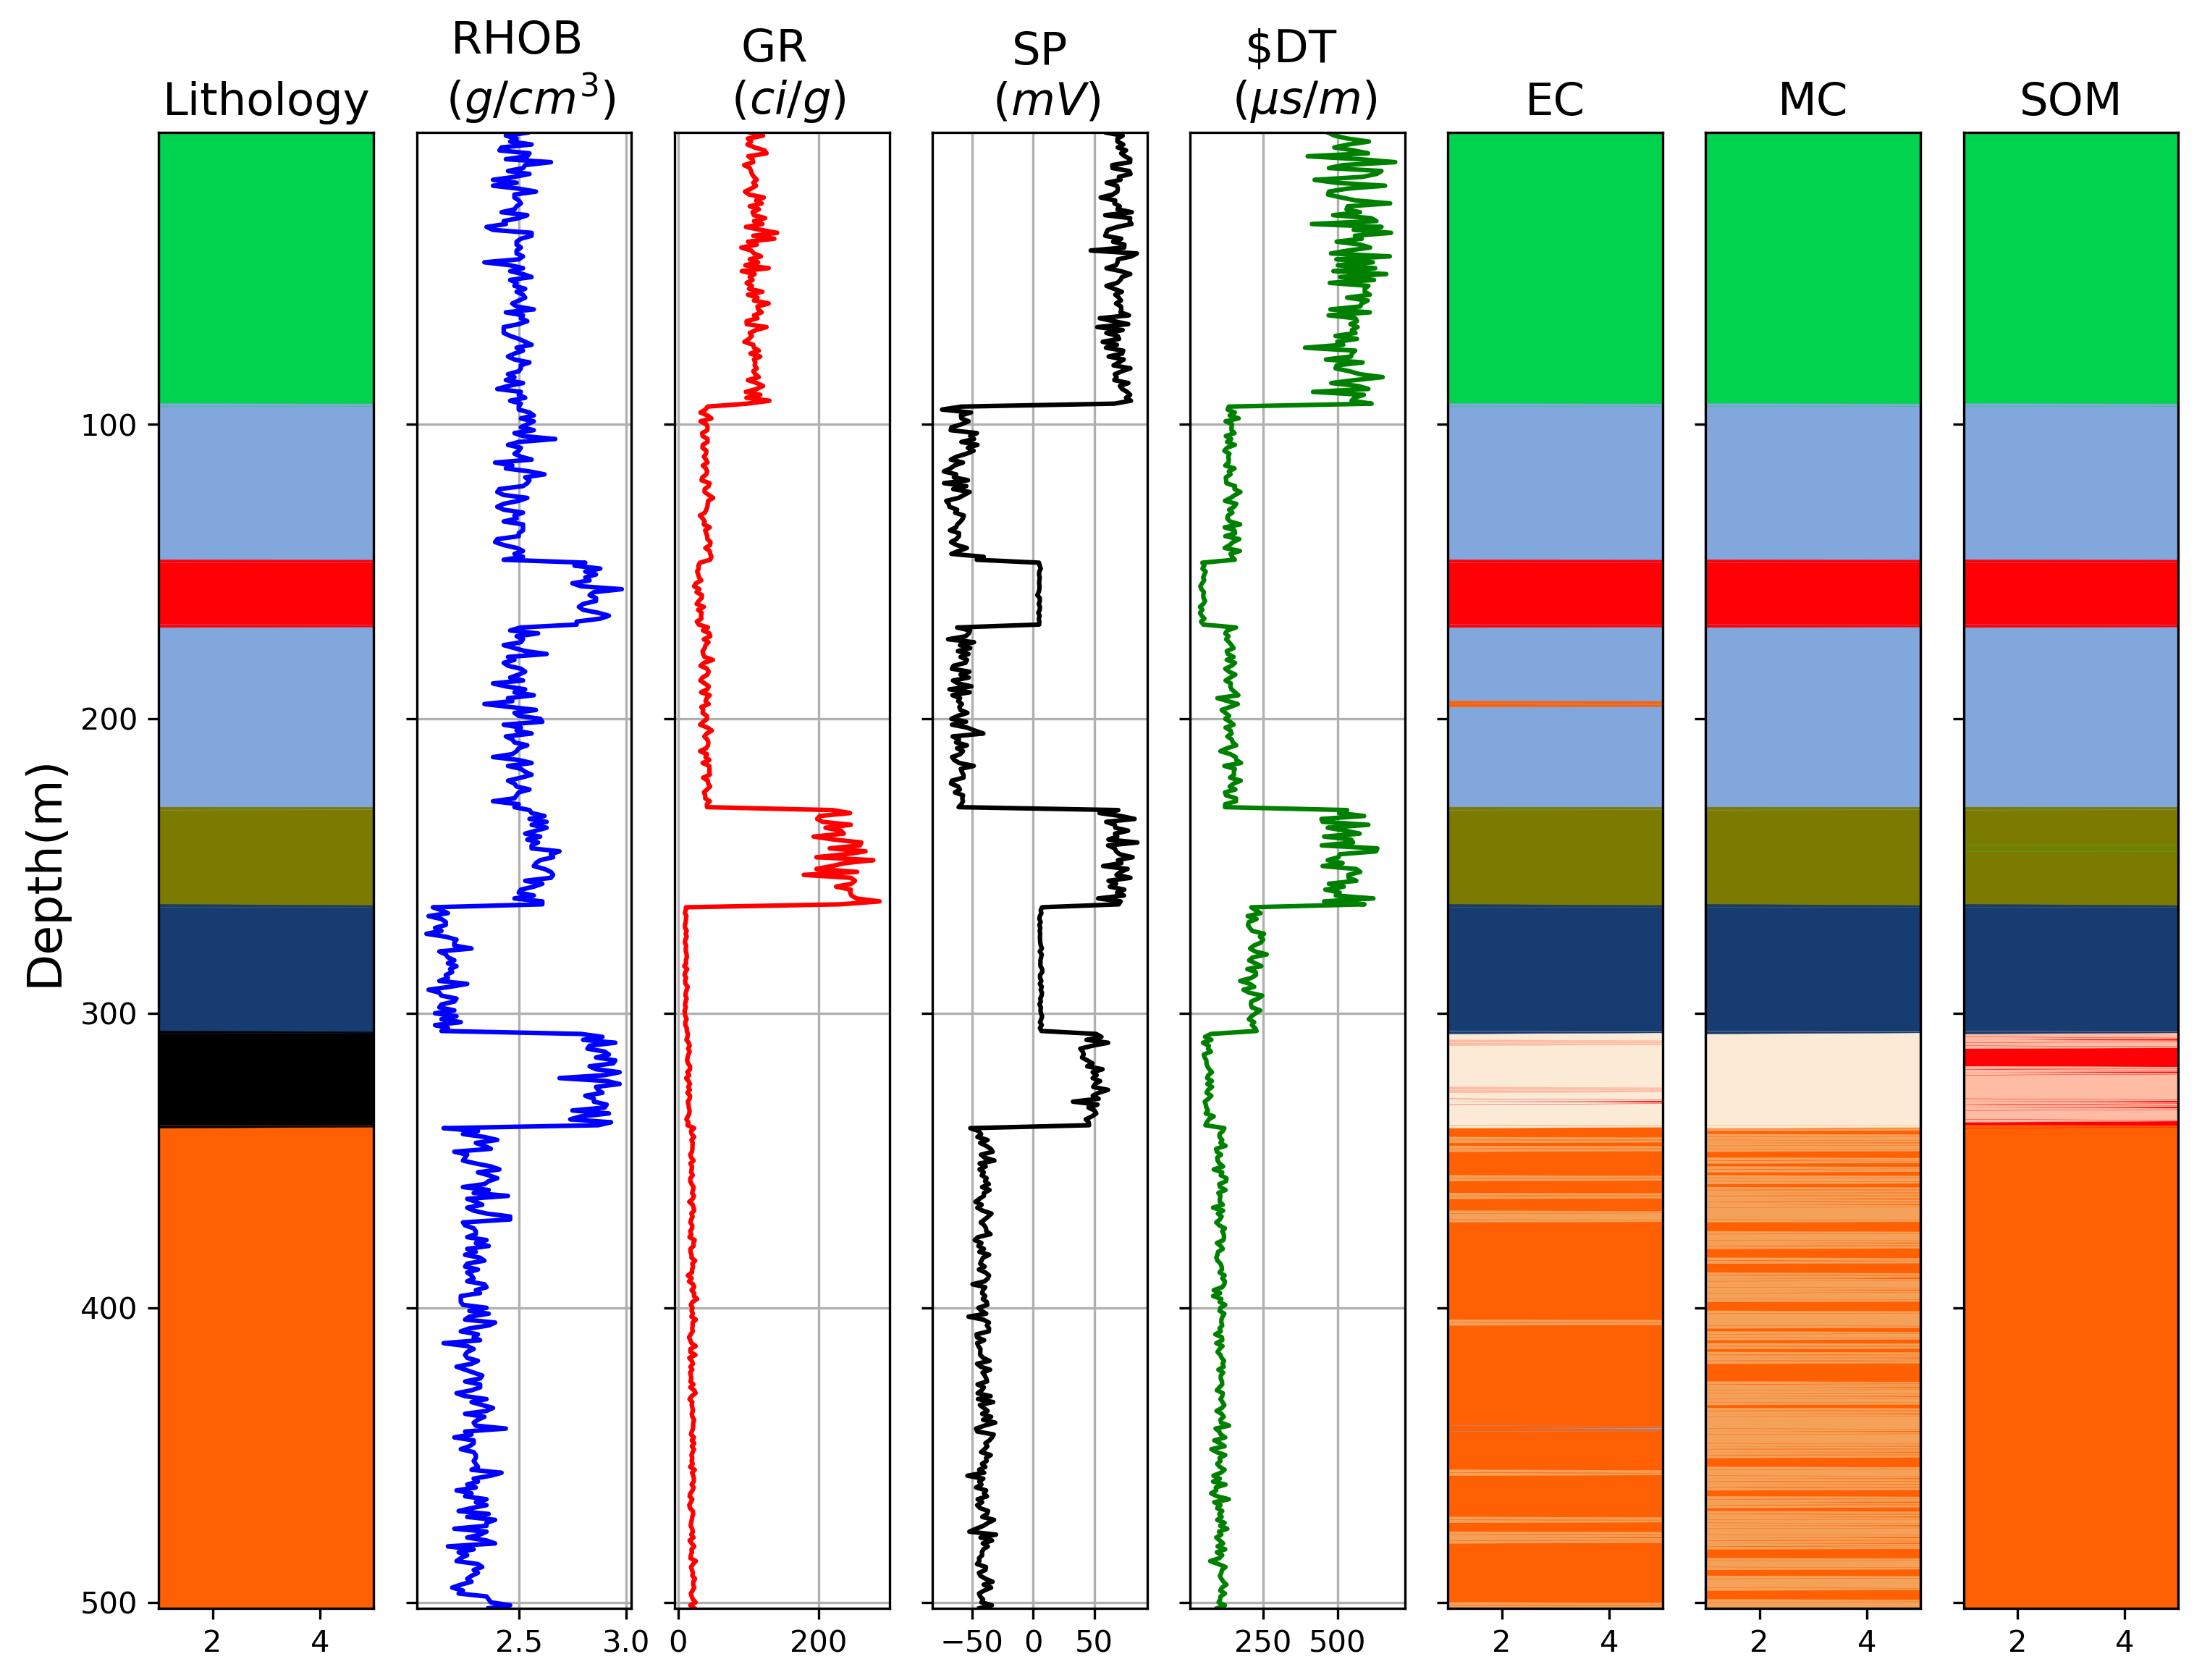

In [44]:
## Resultados de classificação Poço C2

# lê os dados de perfiliagem e rochas originais
pocoC2 = pd.read_csv("../inputs/Sintetico/C2.txt", sep='\s+' , skiprows=1, names=('Rock', 'Code' ,'Depth' ,'RHOB', 'GR','SP','DT'))
#print(c1)#np.loadtxt("../inputs/C1.txt", dtype=float, skiprows=1, usecols=(1,2,3,4,5,6))

#print(poco)

codC2 = np.array(pocoC2.Code)
profC2 = np.array(pocoC2.Depth)
RHOBC2 = np.array(pocoC2.RHOB)
GRC2 = np.array(pocoC2.GR)
SPC2 = np.array(pocoC2.SP)
DTC2 = np.array(pocoC2.DT)


#lê os dados da classificação Euclideana

euclidesC2 = pd.read_csv('../outputs/Sintetico/Result_eucli_C2_normalizado.txt', sep='\s+' , names=('Depth(m)' ,'Character', 'ClassEucli'))

ClassEuclidesC2 = np.array(euclidesC2.ClassEucli)

#Lê os dados da classificação Mahalanobeana

mahaC2 = pd.read_csv('../outputs/Sintetico/Result_maha_C2_normalizado.txt', sep='\s+' , names=('Depth(m)' ,'Character', 'ClassMaha'))

ClassMahalanobisC2 = np.array(mahaC2.ClassMaha)

#Lê os dados da classificação Kohoneana

kohoC2 = pd.read_csv('../outputs/Sintetico/well_C2_SOM_normalizado.txt', sep='\s+' , names=('Depth(m)' ,'Character1', 'ClassKoho', 'Character2','Real','Character3'))

ClassKohonenC2 = np.array(kohoC2.ClassKoho)

codigo={1:['#00d34e','shale2'],
        2:['#82a7dd','dolomite'],
        3:['#ff0004','diabase'],
        4:['#ff6004','conglomerate'],
       451:['#f4a15a','ce1'],
       452:['#ffddaa','ce2'],
       453:['#ffd9b7','ce3'],
       454:['#faead6','ce4'],
         5:['#ffbca4','crystalline'],
       6:['#7b7b01' ,'shale1'],
       7:['#173c72' ,'halite'],
       8:['#a70001' ,'granite'],
       9:['#ffe57b' ,'sandstone'],
       10:['#000000','basalt']}

figure = plm(8,altura=9,comprimento=12,dpi=300)
figure.plot_l(0,codC2,profC2, codigo, GRC2,minimo=1,maximo=5,titulo='Lithology', descricao_y='Depth(m)')#0 é aprosição do track
figure.plot_s(1,RHOBC2,profC2,cor='b',titulo='RHOB \n $(g/cm^{3})$',descricao_x='')
figure.plot_s(2,GRC2,profC2,cor='r',titulo='GR \n $(ci/g$)',descricao_x='')
figure.plot_s(3,SPC2,profC2,cor='k',titulo='SP\n $(mV)$',descricao_x='')
figure.plot_s(4,DTC2,profC2,cor='g',titulo='$DT \n $(\mu s/m)$',descricao_x='')
figure.plot_l(5,ClassEuclidesC2,profC2, codigo, GRC2,minimo=1,maximo=5,titulo='EC')#0 é aprosição do track

figure.plot_l(6,ClassMahalanobisC2,profC2, codigo, GRC2,minimo=1,maximo=5,titulo='MC')

figure.plot_l(7,ClassKohonenC2,profC2, codigo, GRC2,minimo=1,maximo=5,titulo='SOM')

plt.savefig('../images/RESULTADOC2_normalizado.pdf',dpi=600) 


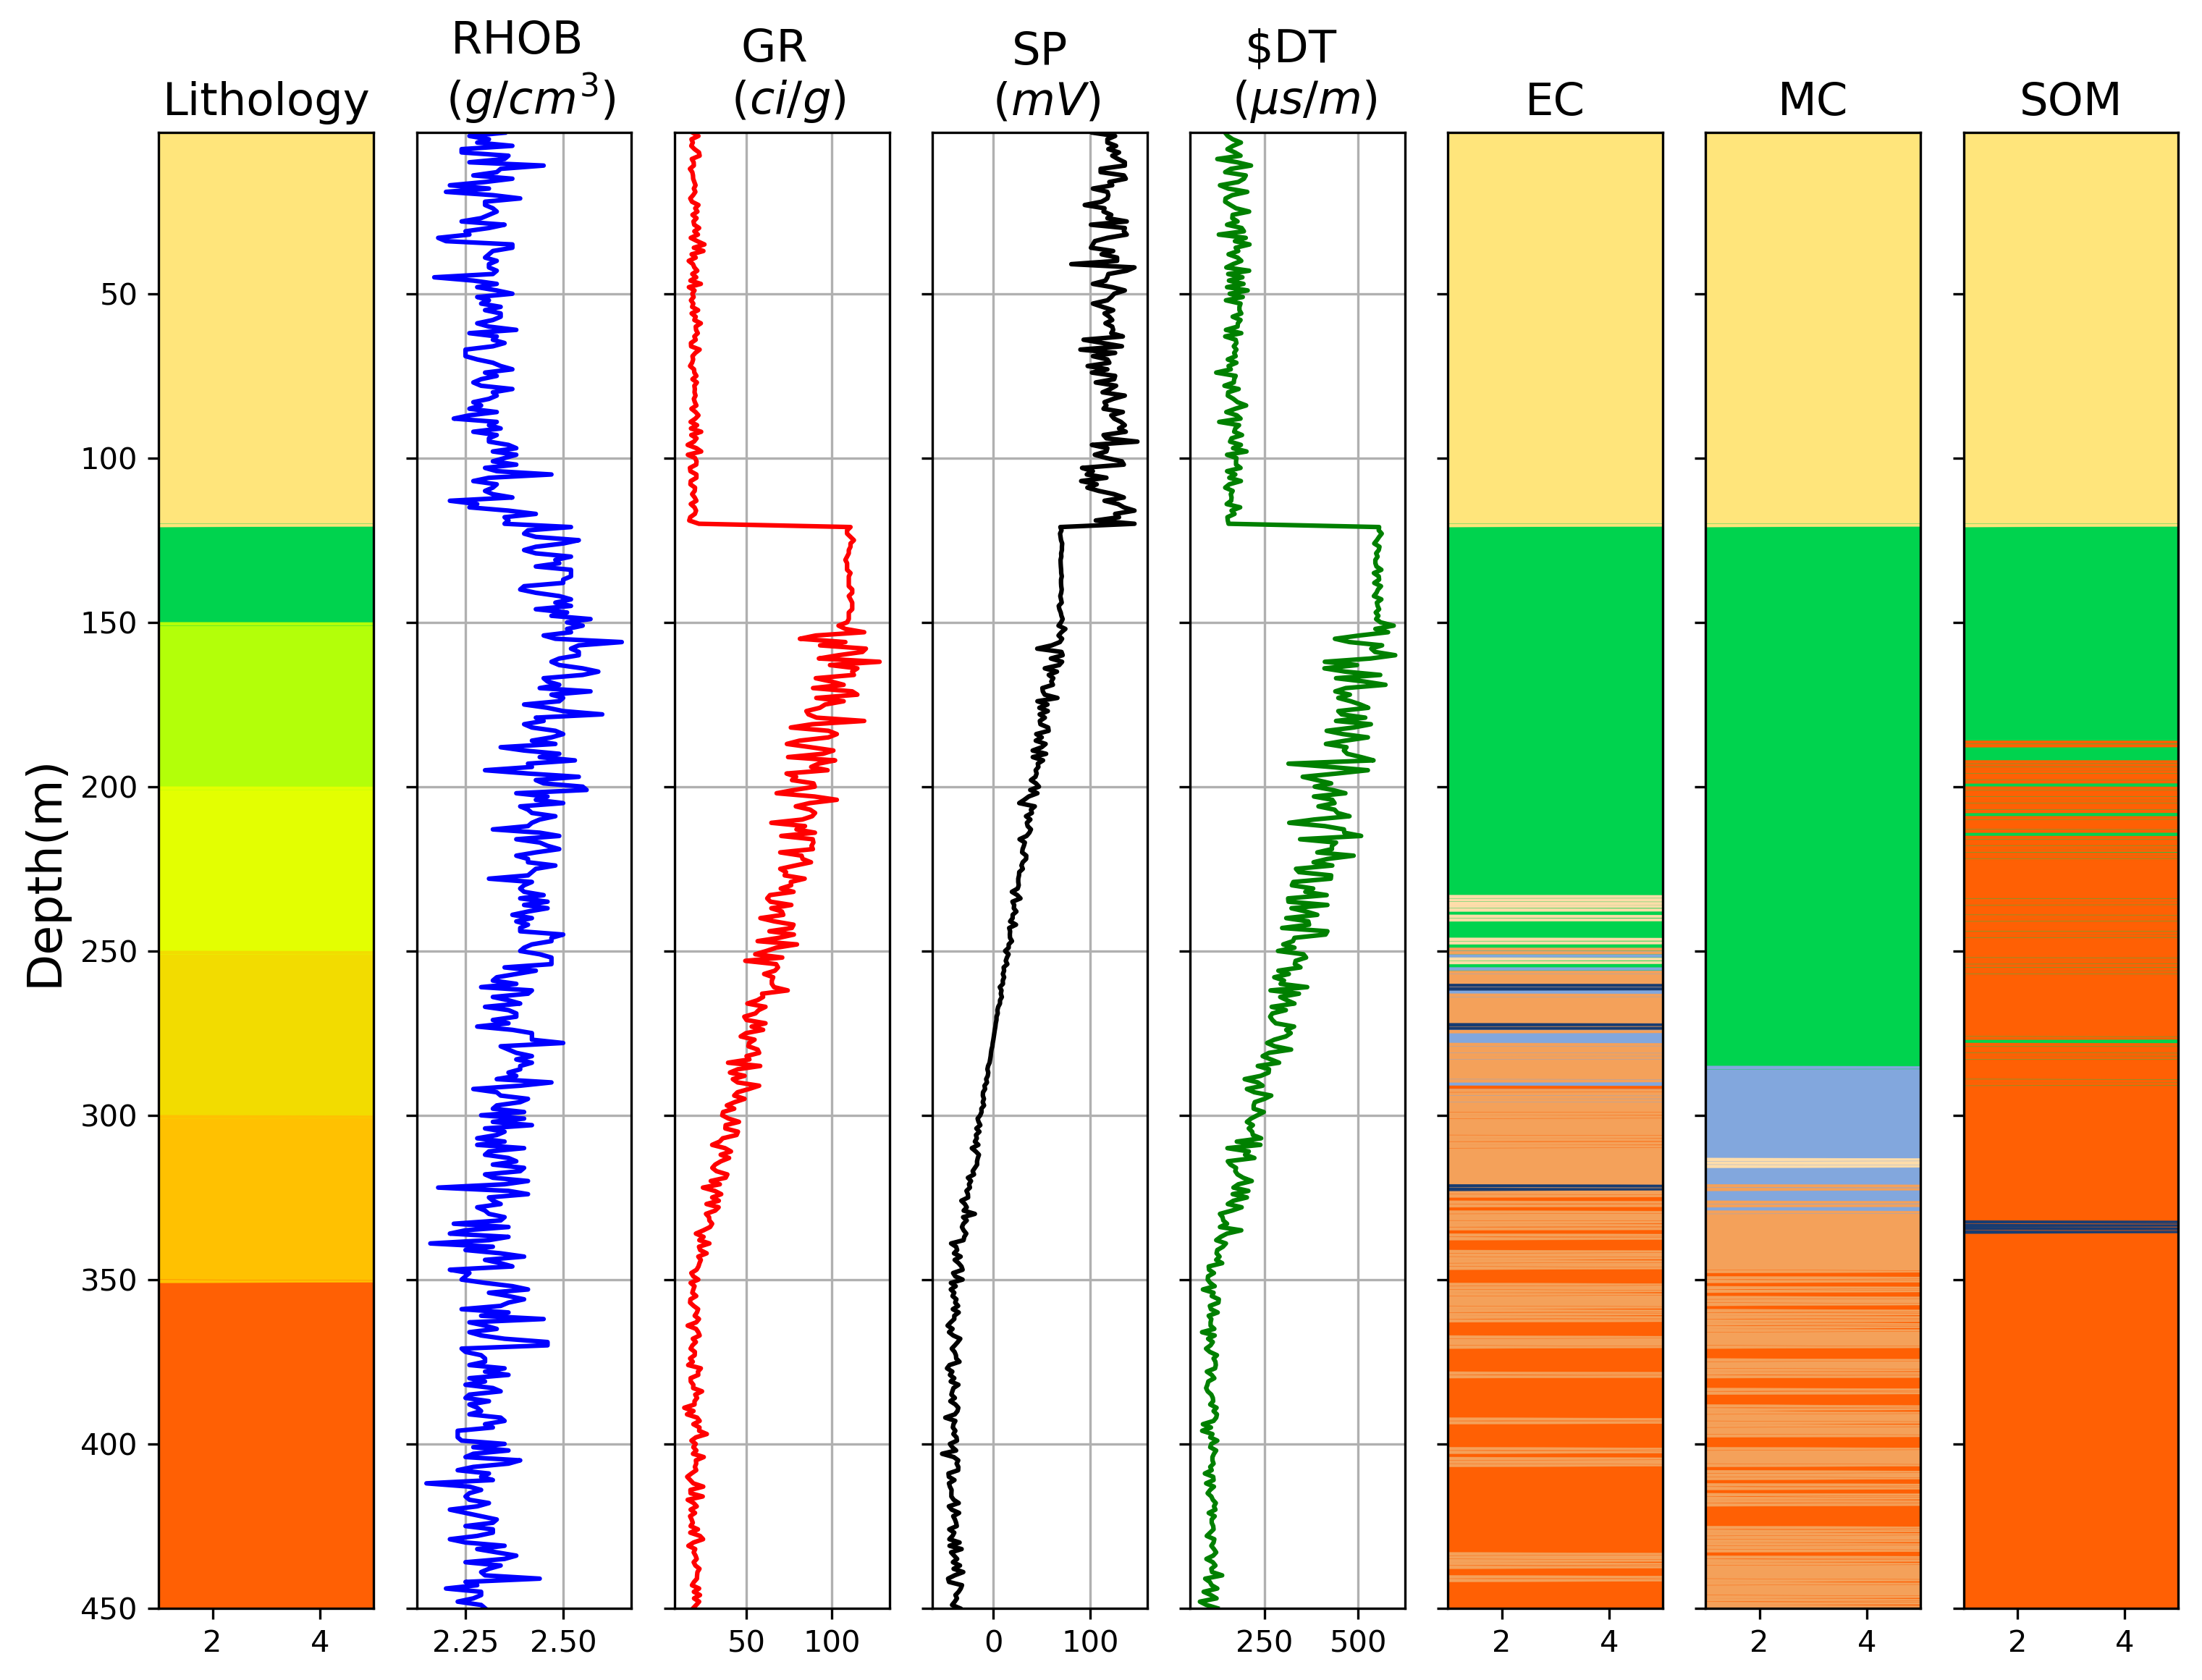

In [45]:
## Resultados de classificação Poço C2

# lê os dados de perfiliagem e rochas originais
pocoC3 = pd.read_csv("../inputs/Sintetico/C3.txt", sep='\s+' , skiprows=1, names=('Rock', 'Code' ,'Depth' ,'RHOB', 'GR','SP','DT'))


#print(poco)

codC3 = np.array(pocoC3.Code)
profC3 = np.array(pocoC3.Depth)
RHOBC3 = np.array(pocoC3.RHOB)
GRC3 = np.array(pocoC3.GR)
SPC3 = np.array(pocoC3.SP)
DTC3 = np.array(pocoC3.DT)


#lê os dados da classificação Euclideana

euclidesC3 = pd.read_csv('../outputs/Sintetico/Result_eucli_C3_normalizado.txt', sep='\s+' , names=('Depth(m)' ,'Character', 'ClassEucli'))

ClassEuclidesC3 = np.array(euclidesC3.ClassEucli)

#Lê os dados da classificação Mahalanobeana

mahaC3 = pd.read_csv('../outputs/Sintetico/Result_maha_C3_normalizado.txt', sep='\s+' , names=('Depth(m)' ,'Character', 'ClassMaha'))

ClassMahalanobisC3 = np.array(mahaC3.ClassMaha)

#Lê os dados da classificação Kohoneana

kohoC3 = pd.read_csv('../outputs/Sintetico/well_C3_SOM_normalizado.txt', sep='\s+' , names=('Depth(m)' ,'Character1', 'ClassKoho', 'Character2','Real','Character3'))

ClassKohonenC3 = np.array(kohoC3.ClassKoho)

codigo={1:['#00d34e','shale2'],
        2:['#82a7dd','dolomite'],
        3:['#ff0004','diabase'],
        4:['#ff6004','conglomerate'],
       451:['#f4a15a','ce1'],
       452:['#ffddaa','ce2'],
       453:['#ffd9b7','ce3'],
       454:['#faead6','ce4'],
         5:['#ffbca4','crystalline'],
       6:['#7b7b01' ,'shale1'],
       7:['#173c72' ,'halite'],
       8:['#a70001' ,'granite'],
       9:['#ffe57b' ,'sandstone'],
        10:['#000000','basalt'],
       141:['#b3ff09','sc1'],
       142:['#e3ff01','sc2'],
       143:['#f2dc00','sc3'],
       144:['#ffc101','sc4']}

figure = plm(8,altura=9,comprimento=12,dpi=300)
figure.plot_l(0,codC3,profC3, codigo, GRC3,minimo=1,maximo=5,titulo='Lithology', descricao_y='Depth(m)')#0 é aprosição do track
figure.plot_s(1,RHOBC3,profC3,cor='b',titulo='RHOB \n $(g/cm^{3})$',descricao_x='')
figure.plot_s(2,GRC3,profC3,cor='r',titulo='GR \n $(ci/g$)',descricao_x='')
figure.plot_s(3,SPC3,profC3,cor='k',titulo='SP\n $(mV)$',descricao_x='')
figure.plot_s(4,DTC3,profC3,cor='g',titulo='$DT \n $(\mu s/m)$',descricao_x='')
figure.plot_l(5,ClassEuclidesC3,profC3, codigo, GRC3,minimo=1,maximo=5,titulo='EC')#0 é aprosição do track

figure.plot_l(6,ClassMahalanobisC3,profC3, codigo, GRC3,minimo=1,maximo=5,titulo='MC')

figure.plot_l(7,ClassKohonenC3,profC3, codigo, GRC3,minimo=1,maximo=5,titulo='SOM')

plt.savefig('../images/RESULTADOC3_norm.pdf',dpi=600) 